# Julijske Alpe

### Projektna naloga pri predmetu Programiranje 1

## Uvod
Z uporabo knjižnice Pandas bom analizirala hribe iz Julijskih alp iz podatkov pridobljenih na strani https://www.hribi.net/gorovja​ . 

Za vsako goro je bilo zajeto:
- ime
- višina
- vrsta
- število ogledov
- mesto priljubljenosti
- število slik
- število poti
- število GPS sledi
- število vpisov v vpisni knjigi

Podatki so bili zajeti z poberi_strani.py in naredi_json.py, shranjeni pa so v datoteki obdelani-podatki.

Hipoteze:
- Višji vrhovi so bolj priljubljeni
- Najbolj priljubljene gore imajo tudi največje število ogledov
- Višji vrhovi imajo večje število poti
- Višji vrhovi imajo večje število vpisov
- Pod vrsto se največkrat pojavi vrh
- Bolj priljubljeni vrhovi imajo več slik
- Vrhovi z večjim številom poti imajo več GPS sledi
- Vrhovi z večjim številom vpisov imajo tudi večje število slik
- Kolikšno je povprečna višina, število ogledov, mesto priljubljenosti, število slik, število poti, število gps sledi in število vpisov v vpisni knjigi v Julijskih Alpah?

## Analiza

In [1]:
import pandas as pd
pd.options.display.max_rows = 10
%matplotlib inline

In [2]:
import os.path
csv_datoteka = os.path.join("obdelani-podatki", "hribi.csv")
podatki_o_hribih = pd.read_csv(csv_datoteka)

In [3]:
podatki_o_hribih

,ime,visina,vrsta,ogledi,mesto_priljubljenosti,stevilo_slik,stevilo_poti,stevilo_gps_sledi,stevilo_vpisov_v_vpisni_knjigi
0,Ablanca,2004,vrh,530758,217,11,9,1,1.0
1,Adam,2012,vrh,428230,529,1,1,0,1.0
2,Ajdovski gradec,580,vrh,5890,2066,10,2,0,NaN
3,Aljažev dom v Vratih,1015,"koča, bivak, cerkev",540629,197,11,1,1,3.0
4,Batognica,2164,vrh,541776,192,6,9,1,6.0
...,...,...,...,...,...,...,...,...,...
546,Šplevta,2272,NaN,430321,520,3,2,0,NaN
547,Žabiški Kuk,1844,vrh,358580,777,20,6,0,NaN
548,Žerjavec (Kavče),805,vrh,2043,2267,9,2,0,NaN
549,Žičnica čez Tolminko,500,NaN,256189,1166,1,1,0,NaN


Številov vpisov v vpisni knjigi je treba popraviti, da bodo števila brez vejice, namesto NaN bo pa 0.

In [4]:
def popravi_vpise(podatek):
    if pd.isna(podatek):
        return 0 
    else:
        return int(podatek)

In [5]:
hribi = podatki_o_hribih

In [6]:
hribi["stevilo_vpisov_v_vpisni_knjigi"] = hribi["stevilo_vpisov_v_vpisni_knjigi"].apply(popravi_vpise)

In [7]:
hribi

,ime,visina,vrsta,ogledi,mesto_priljubljenosti,stevilo_slik,stevilo_poti,stevilo_gps_sledi,stevilo_vpisov_v_vpisni_knjigi
0,Ablanca,2004,vrh,530758,217,11,9,1,1
1,Adam,2012,vrh,428230,529,1,1,0,1
2,Ajdovski gradec,580,vrh,5890,2066,10,2,0,0
3,Aljažev dom v Vratih,1015,"koča, bivak, cerkev",540629,197,11,1,1,3
4,Batognica,2164,vrh,541776,192,6,9,1,6
...,...,...,...,...,...,...,...,...,...
546,Šplevta,2272,NaN,430321,520,3,2,0,0
547,Žabiški Kuk,1844,vrh,358580,777,20,6,0,0
548,Žerjavec (Kavče),805,vrh,2043,2267,9,2,0,0
549,Žičnica čez Tolminko,500,NaN,256189,1166,1,1,0,0


#### Hipoteza 1: Višji vrhovi so bolj priljubljeni

Hribi razvrščeni po mestu priljubljenosti:

In [8]:
hribi_priljubljenost_visina = hribi[["ime", "visina", "mesto_priljubljenosti"]]
hribi_priljubljenost_visina.sort_values("mesto_priljubljenosti", ascending=True)

,ime,visina,mesto_priljubljenosti
428,Triglav,2864,1
163,Krn,2244,8
470,Viševnik,2050,9
151,Koča pri Triglavskih jezerih,1685,10
209,Mangart,2679,15
...,...,...,...
292,Planina Zapotok,1385,2756
511,Zagorelec,2090,2769
434,Velika Glava,1883,2840
305,Plešivec,1962,2887


In po višini:

In [9]:
hribi_priljubljenost_visina.sort_values("visina", ascending=False)

,ime,visina,mesto_priljubljenosti
428,Triglav,2864,1
223,Montaž / Jôf di Montasio,2753,56
538,Škrlatica,2740,36
205,Mali Triglav,2725,242
209,Mangart,2679,15
...,...,...,...
78,Gregorčičev slap,390,2055
131,Korita Soče pri Kršovcu,390,913
451,Veliki slap Kozjak,250,496
204,Mali slap Kozjak,230,1016


Sedaj pa še odvisnost priljubljenosti od višine:

<AxesSubplot:xlabel='visina', ylabel='mesto_priljubljenosti'>

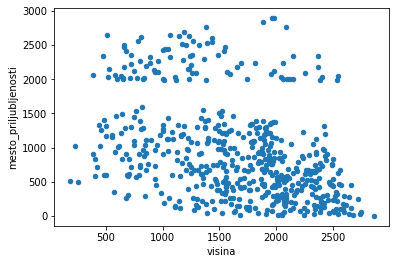

In [10]:
hribi.plot.scatter(x = "visina", y = "mesto_priljubljenosti")

Priljubljenost torej ni odvisna od višine. Kaj pa od števila ogledov?

#### Hipoteza 2: Najbolj priljubljene gore imajo tudi največje število ogledov

Hribi razvrščeni po številu ogledov:

In [11]:
hribi_ogledi_priljubljenost = hribi[["ime", "ogledi", "mesto_priljubljenosti"]]
hribi_ogledi_priljubljenost.sort_values("ogledi", ascending=False)

,ime,ogledi,mesto_priljubljenosti
428,Triglav,1421929,1
163,Krn,871740,8
470,Viševnik,865252,9
151,Koča pri Triglavskih jezerih,857079,10
209,Mangart,835506,15
...,...,...,...
292,Planina Zapotok,232,2756
511,Zagorelec,210,2769
434,Velika Glava,117,2840
305,Plešivec,65,2887


<AxesSubplot:xlabel='ogledi', ylabel='mesto_priljubljenosti'>

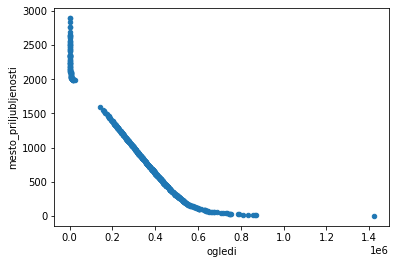

In [12]:
hribi.plot.scatter(x = "ogledi", y = "mesto_priljubljenosti")

Priljubljenost je torej definitivno odvisna od števila ogledov. Večje kot imajo število ogledov, višje je njihovo mesto priljubljenosti.

#### Hipoteza 3: Višji vrhovi imajo večje število poti

Hribi razvrščeni po številu poti

In [13]:
hribi_visina_poti = hribi[["ime", "visina", "stevilo_poti"]]
hribi_visina_poti.sort_values("stevilo_poti", ascending=False)

,ime,visina,stevilo_poti
428,Triglav,2864,27
470,Viševnik,2050,21
476,Vogel,1922,19
527,Črna prst,1844,18
213,Matajur,1642,13
...,...,...,...
329,Rakova Špica,2545,0
27,Bivak Tarvisio,2150,0
63,Frdamane police,2284,0
420,Tolminska korita,180,0


<AxesSubplot:xlabel='visina', ylabel='stevilo_poti'>

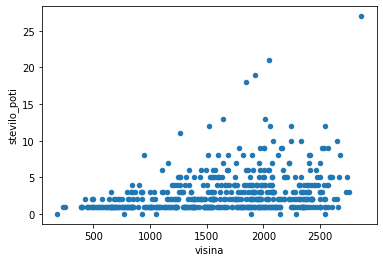

In [14]:
hribi.plot.scatter(x = "visina", y = "stevilo_poti")

Število poti torej ni odvisno od višine hriba. Ali je mogoče število vpisov v vpisni knjigi odvisno od višine?

#### Hipoteza 4: Višji vrhovi imajo večje število vpisov

Hribi po številu vpisov v vpisni knjigi:

In [15]:
hribi_visina_vpisi = hribi[["ime", "visina", "stevilo_vpisov_v_vpisni_knjigi"]]
hribi_visina_vpisi.sort_values("stevilo_vpisov_v_vpisni_knjigi", ascending=False)

,ime,visina,stevilo_vpisov_v_vpisni_knjigi
470,Viševnik,2050,25
428,Triglav,2864,22
42,Debela peč,2014,18
429,Triglavski dom na Kredarici,2515,16
205,Mali Triglav,2725,14
...,...,...,...
239,Partizanska bolnišnica na Mežakli,1050,0
237,Orožnova koča na planini za Liscem,1346,0
234,Okrepčevalnica Slap Voje,745,0
232,Nizki vrh,1488,0


<AxesSubplot:xlabel='visina', ylabel='stevilo_vpisov_v_vpisni_knjigi'>

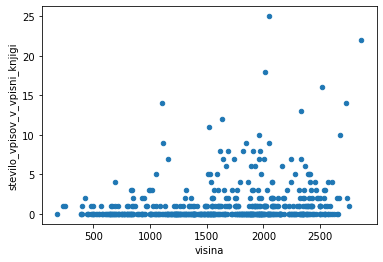

In [16]:
hribi.plot.scatter(x = "visina", y = "stevilo_vpisov_v_vpisni_knjigi")

Tudi število vpisov v vpisno knjigo ni povezano z višino hriba.

#### Hipoteza 5: Pod vrsto se največkrat pojavi vrh

In [17]:
vrsta = hribi.groupby('vrsta').size().sort_values(ascending=False)

In [18]:
vrsta

vrsta
vrh                             299
planina                          54
koča                             27
slap                             23
bivak                            14
                               ... 
koča, bivak, planina              1
koča, jezero, bivak               1
koča, jezero, bivak, planina      1
vrh, planina                      1
vrh, slap                         1
Length: 33, dtype: int64

To tabelo je treba popraviti, ker imajo nekateri hribi več vrst.

In [19]:
imena_vrst = ['vrh', 'planina', 'koča', 'slap', 'bivak', 'jezero', 'cerkev']
tabela = pd.DataFrame(index=imena_vrst, columns = ['Število']) 
for i in imena_vrst:
    tabela.at[i, 'Število'] = hribi.vrsta.str.count(i).sum()

In [20]:
tabela.sort_values("Število", ascending=False)

,Število
vrh,315
planina,89
koča,65
bivak,44
slap,28
jezero,28
cerkev,20


<AxesSubplot:>

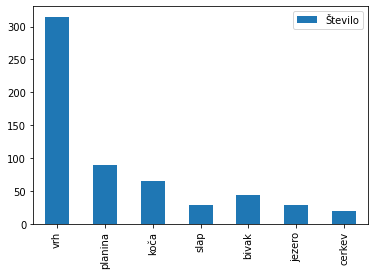

In [21]:
tabela.plot.bar()

Pod vrsto se torej največkrat pojavi vrh.

#### Hipoteza 6: Bolj priljubljeni vrhovi imajo večje število slik

In [22]:
hribi_priljubljenost_slike = hribi[["ime", "mesto_priljubljenosti", "stevilo_slik"]]
hribi_priljubljenost_slike.sort_values("stevilo_slik", ascending=False)

,ime,mesto_priljubljenosti,stevilo_slik
428,Triglav,1,42
96,Jalovec,23,29
209,Mangart,15,26
420,Tolminska korita,518,24
146,Koča na Uskovnici,115,24
...,...,...,...
513,Zavetišče pod Ponco,924,1
362,Slap Beri,1257,0
121,Klečica,1386,0
344,Rigljica,871,0


<AxesSubplot:xlabel='mesto_priljubljenosti', ylabel='stevilo_slik'>

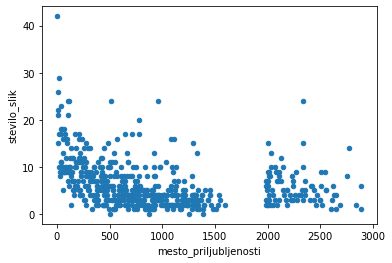

In [23]:
hribi.plot.scatter(x = "mesto_priljubljenosti", y = "stevilo_slik")

Število slik torej ni odvisno od mesta priljubljenosti.

#### Hipoteza 7: Vrhovi z večjim številom poti imajo več GPS sledi

In [24]:
hribi_poti_gps = hribi[["ime", "stevilo_poti", "stevilo_gps_sledi"]]
hribi_poti_gps.sort_values("stevilo_gps_sledi", ascending=False)

,ime,stevilo_poti,stevilo_gps_sledi
428,Triglav,27,6
163,Krn,12,5
425,Tosc,5,4
5,Bavški Grintavec,3,4
96,Jalovec,10,4
...,...,...,...
195,Mala Rodica,2,0
194,Mala Ponca,3,0
193,Mala Osojnica,2,0
190,Mala Boka,1,0


<AxesSubplot:xlabel='stevilo_poti', ylabel='stevilo_gps_sledi'>

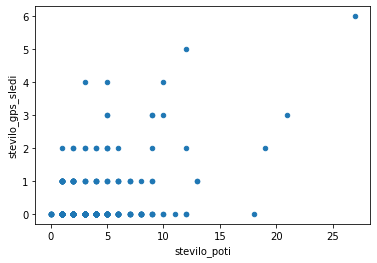

In [25]:
hribi.plot.scatter(x = "stevilo_poti", y = "stevilo_gps_sledi")

Število GPS sledi torej ni odvisno od števila poti do hriba.

#### Hipoteza 8: Vrhovi z večjim številom vpisov imajo tudi večje število slik

<AxesSubplot:xlabel='stevilo_vpisov_v_vpisni_knjigi', ylabel='stevilo_slik'>

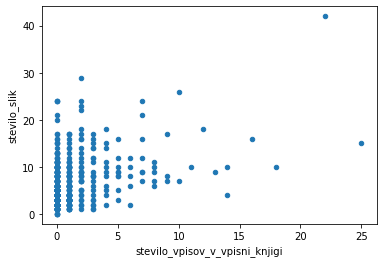

In [26]:
hribi.plot.scatter(x = "stevilo_vpisov_v_vpisni_knjigi", y = "stevilo_slik")

Število slik za hrib torej tudi ni odvisno od število vpisov v vpisni knjigi.

#### Kolikšno je povprečna višina, število ogledov, mesto priljubljenosti, število slik, število poti, število gps sledi in število vpisov v vpisni knjigi v Julijskih Alpah?

In [27]:
hribi.mean()

visina                              1642.929220
ogledi                            338801.923775
mesto_priljubljenosti                938.333938
stevilo_slik                           6.332123
stevilo_poti                           2.791289
stevilo_gps_sledi                      0.217786
stevilo_vpisov_v_vpisni_knjigi         1.166969
dtype: float64

Povprečna višina v Julijskih Alpah je 1643 metre, povprečno število ogledov je 333 802, mesto priljubljenosti pa 938. Povprečje slik za vsak hrib je 6, število poti 2, število gps sledi 0, število vpisov v vpisni knjigi pa 1.

## Zaključek

Mesto priljubljenosti hriba ni odvisno od njegove višine, je pa odvisno od števila ogledov. Višji vrhovi nimajo večjega števila poti ali večjega števila vpisov v vpisno knjigo. Pod vrsto se največkrat pojavi vrh. Hribi z višjim mestom priljubljenosti povprečno nimajo več slik, prav tako tudi ne vrhovi z večjim številom vpisov v vpisno knjigo. Hribi z večjim številom poti nimajo večjega števila slik. Povprečna višina v Julijskih Alpah je 1643 metre, povprečno število ogledov je 333 801, mesto priljubljenosti pa 938. Povprečje slik za vsak hrib je 6, število poti 2, število gps sledi 0, število vpisov v vpisni knjigi pa 1.